# Circuit Scaling Analysis

This notebook provides flexible scaling analysis for circuit extraction benchmarks.

## Features
- Group by either source or target circuit size
- Plot scaling by the non-grouped dimension
- Multiple metrics support
- Linear and log-log scaling analysis
- Trend lines and scaling factors for each group

## Usage
1. Paste your benchmark JSONs and circuit size data
2. Configure grouping and plotting options
3. Select the metric to analyze
4. Run the analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Any, Literal
from collections import defaultdict

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

## Input Data

In [2]:
# Benchmark JSON strings
benchmark_jsons = [
    # Example data - replace with your actual benchmark JSONs
    '{"benchmarks": {"resolve_circuit": {"duration_s": 20.88, "mem_before_mb": 360.4, "mem_after_mb": 1492.34, "mem_delta_mb": 1131.94, "peak_mem_mb": 2227.37}, "add_node_set": {"duration_s": 0.1, "mem_before_mb": 1492.34, "mem_after_mb": 907.61, "mem_delta_mb": -584.73, "peak_mem_mb": 1492.34}, "split_subcircuit": {"duration_s": 0.71, "mem_before_mb": 907.61, "mem_after_mb": 976.09, "mem_delta_mb": 68.48, "peak_mem_mb": 976.09}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "register_circuit_folder_asset": {"duration_s": 1.4, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "run_circuit_folder_compression": {"duration_s": 0.2, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "add_compressed_circuit_asset": {"duration_s": 0.2, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 976.09, "mem_after_mb": 976.09, "mem_delta_mb": 0.0, "peak_mem_mb": 976.09}, "add_overview_figure_assets": {"duration_s": 42.02, "mem_before_mb": 976.09, "mem_after_mb": 982.73, "mem_delta_mb": 6.64, "peak_mem_mb": 1072.83}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 982.73, "mem_after_mb": 982.73, "mem_delta_mb": 0.0, "peak_mem_mb": 982.73}}, "benchmarked_time_s": 66.11, "total_execution_time_s": 66.21, "unbenchmarked_time_s": 0.1, "unbenchmarked_percentage": 0.2}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 22.94, "mem_before_mb": 361.94, "mem_after_mb": 1538.91, "mem_delta_mb": 1176.96, "peak_mem_mb": 2481.17}, "add_node_set": {"duration_s": 0.1, "mem_before_mb": 1538.91, "mem_after_mb": 378.13, "mem_delta_mb": -1160.78, "peak_mem_mb": 1538.91}, "split_subcircuit": {"duration_s": 0.7, "mem_before_mb": 378.13, "mem_after_mb": 467.8, "mem_delta_mb": 89.68, "peak_mem_mb": 475.45}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 467.8, "mem_after_mb": 467.8, "mem_delta_mb": 0.0, "peak_mem_mb": 467.8}, "register_circuit_entity": {"duration_s": 0.2, "mem_before_mb": 467.8, "mem_after_mb": 467.8, "mem_delta_mb": 0.0, "peak_mem_mb": 467.8}, "register_circuit_folder_asset": {"duration_s": 2.1, "mem_before_mb": 467.8, "mem_after_mb": 467.8, "mem_delta_mb": 0.0, "peak_mem_mb": 467.8}, "run_circuit_folder_compression": {"duration_s": 2.91, "mem_before_mb": 467.8, "mem_after_mb": 467.8, "mem_delta_mb": 0.0, "peak_mem_mb": 467.8}, "add_compressed_circuit_asset": {"duration_s": 0.6, "mem_before_mb": 467.8, "mem_after_mb": 467.8, "mem_delta_mb": 0.0, "peak_mem_mb": 467.8}, "run_connectivity_matrix_extraction": {"duration_s": 0.3, "mem_before_mb": 467.8, "mem_after_mb": 478.83, "mem_delta_mb": 11.02, "peak_mem_mb": 478.83}, "add_connectivity_matrix_asset": {"duration_s": 0.2, "mem_before_mb": 478.83, "mem_after_mb": 478.83, "mem_delta_mb": 0.0, "peak_mem_mb": 478.83}, "run_basic_connectivity_plots": {"duration_s": 2.15, "mem_before_mb": 478.83, "mem_after_mb": 593.98, "mem_delta_mb": 115.15, "peak_mem_mb": 655.83}, "add_connectivity_plot_assets": {"duration_s": 2.33, "mem_before_mb": 593.98, "mem_after_mb": 562.53, "mem_delta_mb": -31.45, "peak_mem_mb": 768.26}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 562.53, "mem_after_mb": 562.53, "mem_delta_mb": 0.0, "peak_mem_mb": 562.53}, "add_overview_figure_assets": {"duration_s": 19.43, "mem_before_mb": 562.53, "mem_after_mb": 594.25, "mem_delta_mb": 31.72, "peak_mem_mb": 684.21}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 594.25, "mem_after_mb": 594.25, "mem_delta_mb": 0.0, "peak_mem_mb": 594.25}}, "benchmarked_time_s": 54.26, "total_execution_time_s": 54.34, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.2}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 21.85, "mem_before_mb": 361.23, "mem_after_mb": 1491.75, "mem_delta_mb": 1130.52, "peak_mem_mb": 2267.36}, "add_node_set": {"duration_s": 0.1, "mem_before_mb": 1491.75, "mem_after_mb": 907.04, "mem_delta_mb": -584.71, "peak_mem_mb": 1491.75}, "split_subcircuit": {"duration_s": 1.31, "mem_before_mb": 907.04, "mem_after_mb": 996.47, "mem_delta_mb": 89.43, "peak_mem_mb": 1005.11}, "copy_morph_hoc_mod": {"duration_s": 0.3, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "register_circuit_folder_asset": {"duration_s": 3.71, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "run_circuit_folder_compression": {"duration_s": 39.06, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "add_compressed_circuit_asset": {"duration_s": 2.0, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 996.47, "mem_after_mb": 996.47, "mem_delta_mb": 0.0, "peak_mem_mb": 996.47}, "add_overview_figure_assets": {"duration_s": 35.46, "mem_before_mb": 996.47, "mem_after_mb": 999.33, "mem_delta_mb": 2.86, "peak_mem_mb": 1089.27}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 999.33, "mem_after_mb": 999.33, "mem_delta_mb": 0.0, "peak_mem_mb": 999.33}}, "benchmarked_time_s": 104.29, "total_execution_time_s": 104.38, "unbenchmarked_time_s": 0.09, "unbenchmarked_percentage": 0.1}',

    '{"benchmarks": {"resolve_circuit": {"duration_s": 67.42, "mem_before_mb": 361.7, "mem_after_mb": 3347.26, "mem_delta_mb": 2985.56, "peak_mem_mb": 6071.14}, "add_node_set": {"duration_s": 0.5, "mem_before_mb": 3347.26, "mem_after_mb": 384.28, "mem_delta_mb": -2962.98, "peak_mem_mb": 3350.44}, "split_subcircuit": {"duration_s": 2.35, "mem_before_mb": 384.28, "mem_after_mb": 476.67, "mem_delta_mb": 92.39, "peak_mem_mb": 602.63}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "register_circuit_folder_asset": {"duration_s": 1.2, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "run_circuit_folder_compression": {"duration_s": 0.4, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "add_compressed_circuit_asset": {"duration_s": 0.3, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 476.67, "mem_after_mb": 476.67, "mem_delta_mb": 0.0, "peak_mem_mb": 476.67}, "add_overview_figure_assets": {"duration_s": 41.43, "mem_before_mb": 476.67, "mem_after_mb": 499.75, "mem_delta_mb": 23.08, "peak_mem_mb": 585.84}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 499.75, "mem_after_mb": 499.75, "mem_delta_mb": 0.0, "peak_mem_mb": 499.75}}, "benchmarked_time_s": 114.2, "total_execution_time_s": 114.31, "unbenchmarked_time_s": 0.11, "unbenchmarked_percentage": 0.1}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 73.27, "mem_before_mb": 361.64, "mem_after_mb": 3266.98, "mem_delta_mb": 2905.35, "peak_mem_mb": 5716.87}, "add_node_set": {"duration_s": 0.28, "mem_before_mb": 3266.98, "mem_after_mb": 385.6, "mem_delta_mb": -2881.39, "peak_mem_mb": 3266.98}, "split_subcircuit": {"duration_s": 3.41, "mem_before_mb": 385.6, "mem_after_mb": 518.67, "mem_delta_mb": 133.07, "peak_mem_mb": 688.82}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "register_circuit_folder_asset": {"duration_s": 1.6, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "run_circuit_folder_compression": {"duration_s": 2.71, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "add_compressed_circuit_asset": {"duration_s": 0.6, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 518.67, "mem_after_mb": 518.67, "mem_delta_mb": 0.0, "peak_mem_mb": 518.67}, "add_overview_figure_assets": {"duration_s": 35.46, "mem_before_mb": 518.67, "mem_after_mb": 506.3, "mem_delta_mb": -12.37, "peak_mem_mb": 603.58}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 506.3, "mem_after_mb": 506.3, "mem_delta_mb": 0.0, "peak_mem_mb": 506.3}}, "benchmarked_time_s": 117.93, "total_execution_time_s": 118.01, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.1}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 94.26, "mem_before_mb": 361.87, "mem_after_mb": 4882.81, "mem_delta_mb": 4520.95, "peak_mem_mb": 5989.52}, "add_node_set": {"duration_s": 0.25, "mem_before_mb": 4862.81, "mem_after_mb": 1816.48, "mem_delta_mb": -3046.33, "peak_mem_mb": 4862.81}, "split_subcircuit": {"duration_s": 3.31, "mem_before_mb": 1816.48, "mem_after_mb": 1949.71, "mem_delta_mb": 133.23, "peak_mem_mb": 2121.94}, "copy_morph_hoc_mod": {"duration_s": 0.38, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "register_circuit_folder_asset": {"duration_s": 5.41, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "run_circuit_folder_compression": {"duration_s": 25.54, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "add_compressed_circuit_asset": {"duration_s": 2.3, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 1949.71, "mem_after_mb": 1949.71, "mem_delta_mb": 0.0, "peak_mem_mb": 1949.71}, "add_overview_figure_assets": {"duration_s": 34.86, "mem_before_mb": 1949.71, "mem_after_mb": 1941.27, "mem_delta_mb": -8.44, "peak_mem_mb": 2038.5}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 1941.27, "mem_after_mb": 1941.27, "mem_delta_mb": 0.0, "peak_mem_mb": 1941.27}}, "benchmarked_time_s": 166.81, "total_execution_time_s": 166.89, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 300.34, "mem_before_mb": 362.18, "mem_after_mb": 5465.28, "mem_delta_mb": 5103.09, "peak_mem_mb": 5855.09}, "add_node_set": {"duration_s": 0.38, "mem_before_mb": 5435.28, "mem_after_mb": 1822.09, "mem_delta_mb": -3613.19, "peak_mem_mb": 5435.28}, "split_subcircuit": {"duration_s": 9.91, "mem_before_mb": 1822.09, "mem_after_mb": 1984.95, "mem_delta_mb": 162.87, "peak_mem_mb": 2489.66}, "copy_morph_hoc_mod": {"duration_s": 2.68, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "register_circuit_folder_asset": {"duration_s": 25.94, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "run_circuit_folder_compression": {"duration_s": 382.42, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "add_compressed_circuit_asset": {"duration_s": 7.01, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 1984.95, "mem_after_mb": 1984.95, "mem_delta_mb": 0.0, "peak_mem_mb": 1984.95}, "add_overview_figure_assets": {"duration_s": 35.65, "mem_before_mb": 1984.95, "mem_after_mb": 1994.22, "mem_delta_mb": 9.27, "peak_mem_mb": 2084.02}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 1994.22, "mem_after_mb": 1994.22, "mem_delta_mb": 0.0, "peak_mem_mb": 1994.22}}, "benchmarked_time_s": 764.83, "total_execution_time_s": 764.91, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.0}',

    '{"benchmarks": {"resolve_circuit": {"duration_s": 232.22, "mem_before_mb": 361.11, "mem_after_mb": 17495.4, "mem_delta_mb": 17134.29, "peak_mem_mb": 23284.43}, "add_node_set": {"duration_s": 0.58, "mem_before_mb": 17477.4, "mem_after_mb": 7956.37, "mem_delta_mb": -9521.03, "peak_mem_mb": 17477.4}, "split_subcircuit": {"duration_s": 19.69, "mem_before_mb": 7956.37, "mem_after_mb": 8334.23, "mem_delta_mb": 377.86, "peak_mem_mb": 9149.98}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "register_circuit_folder_asset": {"duration_s": 1.3, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "run_circuit_folder_compression": {"duration_s": 0.4, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "add_compressed_circuit_asset": {"duration_s": 0.3, "mem_before_mb": 8334.23, "mem_after_mb": 8334.23, "mem_delta_mb": 0.0, "peak_mem_mb": 8334.23}, "run_connectivity_matrix_extraction": {"duration_s": 0.41, "mem_before_mb": 8334.23, "mem_after_mb": 8344.73, "mem_delta_mb": 10.5, "peak_mem_mb": 8344.73}, "add_connectivity_matrix_asset": {"duration_s": 0.2, "mem_before_mb": 8344.73, "mem_after_mb": 8344.73, "mem_delta_mb": 0.0, "peak_mem_mb": 8344.73}, "run_basic_connectivity_plots": {"duration_s": 2.37, "mem_before_mb": 8344.73, "mem_after_mb": 1081.03, "mem_delta_mb": -7263.7, "peak_mem_mb": 8508.76}, "add_connectivity_plot_assets": {"duration_s": 2.1, "mem_before_mb": 1081.03, "mem_after_mb": 1062.67, "mem_delta_mb": -18.36, "peak_mem_mb": 1201.55}, "generate_overview_figures": {"duration_s": 0.5, "mem_before_mb": 1062.67, "mem_after_mb": 1078.39, "mem_delta_mb": 15.72, "peak_mem_mb": 1078.39}, "add_overview_figure_assets": {"duration_s": 0.92, "mem_before_mb": 1078.39, "mem_after_mb": 1094.58, "mem_delta_mb": 16.19, "peak_mem_mb": 1127.17}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 1094.58, "mem_after_mb": 1094.58, "mem_delta_mb": 0.0, "peak_mem_mb": 1094.58}}, "benchmarked_time_s": 261.29, "total_execution_time_s": 261.38, "unbenchmarked_time_s": 0.09, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 395.04, "mem_before_mb": 361.41, "mem_after_mb": 12036.43, "mem_delta_mb": 11675.02, "peak_mem_mb": 23102.28}, "add_node_set": {"duration_s": 1.08, "mem_before_mb": 12036.43, "mem_after_mb": 390.41, "mem_delta_mb": -11646.02, "peak_mem_mb": 12051.08}, "split_subcircuit": {"duration_s": 26.19, "mem_before_mb": 390.41, "mem_after_mb": 698.2, "mem_delta_mb": 307.79, "peak_mem_mb": 1583.51}, "copy_morph_hoc_mod": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "register_circuit_folder_asset": {"duration_s": 2.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "run_circuit_folder_compression": {"duration_s": 4.01, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "add_compressed_circuit_asset": {"duration_s": 0.5, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 698.2, "mem_after_mb": 698.2, "mem_delta_mb": 0.0, "peak_mem_mb": 698.2}, "add_overview_figure_assets": {"duration_s": 34.75, "mem_before_mb": 698.2, "mem_after_mb": 691.66, "mem_delta_mb": -6.54, "peak_mem_mb": 756.82}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 691.66, "mem_after_mb": 691.66, "mem_delta_mb": 0.0, "peak_mem_mb": 691.66}}, "benchmarked_time_s": 464.27, "total_execution_time_s": 464.35, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 285.08, "mem_before_mb": 362.06, "mem_after_mb": 15931.89, "mem_delta_mb": 15569.82, "peak_mem_mb": 23049.77}, "add_node_set": {"duration_s": 0.86, "mem_before_mb": 15907.89, "mem_after_mb": 393.4, "mem_delta_mb": -15514.49, "peak_mem_mb": 15907.89}, "split_subcircuit": {"duration_s": 22.09, "mem_before_mb": 393.4, "mem_after_mb": 762.13, "mem_delta_mb": 368.73, "peak_mem_mb": 1588.1}, "copy_morph_hoc_mod": {"duration_s": 3.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "register_circuit_folder_asset": {"duration_s": 4.01, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "run_circuit_folder_compression": {"duration_s": 44.78, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "add_compressed_circuit_asset": {"duration_s": 1.3, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 762.13, "mem_after_mb": 762.13, "mem_delta_mb": 0.0, "peak_mem_mb": 762.13}, "add_overview_figure_assets": {"duration_s": 36.36, "mem_before_mb": 762.13, "mem_after_mb": 763.57, "mem_delta_mb": 1.45, "peak_mem_mb": 763.57}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 763.57, "mem_after_mb": 763.57, "mem_delta_mb": 0.0, "peak_mem_mb": 763.57}}, "benchmarked_time_s": 398.08, "total_execution_time_s": 398.16, "unbenchmarked_time_s": 0.08, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 301.84, "mem_before_mb": 363.2, "mem_after_mb": 16270.74, "mem_delta_mb": 15907.54, "peak_mem_mb": 23077.01}, "add_node_set": {"duration_s": 0.82, "mem_before_mb": 16250.74, "mem_after_mb": 7805.61, "mem_delta_mb": -8445.13, "peak_mem_mb": 16250.74}, "split_subcircuit": {"duration_s": 53.45, "mem_before_mb": 7805.61, "mem_after_mb": 8185.47, "mem_delta_mb": 379.86, "peak_mem_mb": 9039.05}, "copy_morph_hoc_mod": {"duration_s": 17.83, "mem_before_mb": 8185.47, "mem_after_mb": 8185.73, "mem_delta_mb": 0.25, "peak_mem_mb": 8185.73}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 8185.73, "mem_after_mb": 8185.73, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.73}, "register_circuit_folder_asset": {"duration_s": 24.53, "mem_before_mb": 8185.73, "mem_after_mb": 8185.99, "mem_delta_mb": 0.26, "peak_mem_mb": 8185.99}, "run_circuit_folder_compression": {"duration_s": 402.41, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "add_compressed_circuit_asset": {"duration_s": 6.51, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 8185.99, "mem_after_mb": 8185.99, "mem_delta_mb": 0.0, "peak_mem_mb": 8185.99}}, "benchmarked_time_s": 807.89, "total_execution_time_s": 807.99, "unbenchmarked_time_s": 0.1, "unbenchmarked_percentage": 0.0}',
]

# Circuit sizes: (source_size, target_size) for each benchmark
circuit_sizes = [
    (4870, 10),
    (4870, 100),
    (4870, 1000),

    (11032, 10),
    (11032, 100),
    (11032, 1000),
    (11032, 10000),

    (30190, 10),
    (30190, 100),
    (30190, 1000),
    (30190, 10000),
]

# Labels for each benchmark (optional)
benchmark_labels = [
    "nbS1-HEX0-L4 (10 neurons)",
    "nbS1-HEX0-L4 (100 neurons)",
    "nbS1-HEX0-L4 (1000 neurons)",

    "nbS1-HEX0-L6 (10 neurons)",
    "nbS1-HEX0-L6 (100 neurons)",
    "nbS1-HEX0-L6 (1000 neurons)",
    "nbS1-HEX0-L6 (10000 neurons)",

    "nbS1-HEX0 (10 neurons)",
    "nbS1-HEX0 (100 neurons)",
    "nbS1-HEX0 (1000 neurons)",
    "nbS1-HEX0 (10000 neurons)",
]

## Configuration

In [3]:
# ===== CONFIGURATION =====

# Grouping and plotting configuration
GROUP_BY: Literal['source', 'target'] = 'source'  # Group by source or target size
PLOT_BY: Literal['source', 'target'] = 'target'   # Plot scaling by source or target size (should be different from GROUP_BY)

# Metric to analyze
METRIC_COLUMN = 'split_subcircuit_duration_s'  # Change this to analyze different metrics
# METRIC_COLUMN = 'run_circuit_folder_compression_duration_s'  # Change this to analyze different metrics

# Plot configuration
SHOW_LINEAR = True      # Show linear scale plot
SHOW_LOG = True         # Show log-log scale plot
SHOW_TREND_LINES = True # Show trend lines for each group
SHOW_SCALING_FACTORS = True  # Show scaling factors on log plot

# Validate configuration
if GROUP_BY == PLOT_BY:
    raise ValueError("GROUP_BY and PLOT_BY must be different. Choose one to group by and the other to plot by.")

print(f"Configuration:")
print(f"  - Grouping by: {GROUP_BY} circuit size")
print(f"  - Plotting by: {PLOT_BY} circuit size")
print(f"  - Analyzing metric: {METRIC_COLUMN}")

Configuration:
  - Grouping by: source circuit size
  - Plotting by: target circuit size
  - Analyzing metric: split_subcircuit_duration_s


## Data Processing

In [4]:
def parse_benchmarks_with_sizes(json_strings: list[str], 
                               sizes: list[tuple[int, int]], 
                               labels: list[str] | None = None) -> pd.DataFrame:
    """Parse benchmark JSONs and add circuit size information."""
    if labels is None:
        labels = [f"Run {i+1}" for i in range(len(json_strings))]
    
    if len(labels) != len(json_strings) or len(sizes) != len(json_strings):
        raise ValueError("Number of labels, sizes, and benchmarks must match")
    
    rows = []
    
    for label, json_str, (source_size, target_size) in zip(labels, json_strings, sizes):
        data = json.loads(json_str)
        benchmarks = data.get("benchmarks", {})
        
        # Add overall metrics and circuit sizes
        row = {
            "label": label,
            "source_size": source_size,
            "target_size": target_size,
            "benchmarked_time_s": data.get("benchmarked_time_s"),
            "total_execution_time_s": data.get("total_execution_time_s"),
        }
        
        # Add individual section metrics
        for section_name, section_data in benchmarks.items():
            row[f"{section_name}_duration_s"] = section_data.get("duration_s")
            row[f"{section_name}_mem_delta_mb"] = section_data.get("mem_delta_mb")
            row[f"{section_name}_peak_mem_mb"] = section_data.get("peak_mem_mb")
        
        rows.append(row)
    
    return pd.DataFrame(rows)

# Parse the data
df = parse_benchmarks_with_sizes(benchmark_jsons, circuit_sizes, benchmark_labels)

print("Parsed DataFrame:")
display(df[['label', 'source_size', 'target_size', METRIC_COLUMN]].dropna())

Parsed DataFrame:


,label,source_size,target_size,split_subcircuit_duration_s
0,nbS1-HEX0-L4 (10 neurons),4870,10,0.71
1,nbS1-HEX0-L4 (100 neurons),4870,100,0.70
2,nbS1-HEX0-L4 (1000 neurons),4870,1000,1.31
3,nbS1-HEX0-L6 (10 neurons),11032,10,2.35
4,nbS1-HEX0-L6 (100 neurons),11032,100,3.41
5,nbS1-HEX0-L6 (1000 neurons),11032,1000,3.31
6,nbS1-HEX0-L6 (10000 neurons),11032,10000,9.91
7,nbS1-HEX0 (10 neurons),30190,10,19.69
8,nbS1-HEX0 (100 neurons),30190,100,26.19
9,nbS1-HEX0 (1000 neurons),30190,1000,22.09


## Scaling Analysis

In [5]:
def perform_scaling_analysis(df: pd.DataFrame, 
                           group_by: str, 
                           plot_by: str, 
                           metric_column: str) -> dict:
    """Perform scaling analysis with flexible grouping."""
    
    # Check if metric exists
    if metric_column not in df.columns:
        available_metrics = [col for col in df.columns if col.endswith('_duration_s') or col.endswith('_peak_mem_mb')]
        raise ValueError(f"Metric '{metric_column}' not found. Available: {available_metrics}")
    
    # Remove rows with missing metric values
    df_clean = df.dropna(subset=[metric_column])
    
    if df_clean.empty:
        raise ValueError(f"No valid data found for metric '{metric_column}'")
    
    # Group data
    group_col = f"{group_by}_size"
    plot_col = f"{plot_by}_size"
    
    groups = {}
    for group_value in df_clean[group_col].unique():
        group_data = df_clean[df_clean[group_col] == group_value].copy()
        group_data = group_data.sort_values(plot_col)
        
        groups[group_value] = {
            'x_values': group_data[plot_col].values,
            'y_values': group_data[metric_column].values,
            'labels': group_data['label'].values,
            'data': group_data
        }
    
    return groups

def calculate_scaling_factor(x_values, y_values):
    """Calculate scaling factor from log-log relationship."""
    if len(x_values) < 2 or any(v <= 0 for v in x_values) or any(v <= 0 for v in y_values):
        return None
    
    log_x = np.log10(x_values)
    log_y = np.log10(y_values)
    
    try:
        slope, intercept = np.polyfit(log_x, log_y, 1)
        return slope, intercept
    except:
        return None

# Perform analysis
groups = perform_scaling_analysis(df, GROUP_BY, PLOT_BY, METRIC_COLUMN)

print(f"Found {len(groups)} groups:")
for group_value, group_data in groups.items():
    print(f"  - {GROUP_BY.title()} size {group_value}: {len(group_data['x_values'])} data points")

Found 3 groups:
  - Source size 4870: 3 data points
  - Source size 11032: 4 data points
  - Source size 30190: 4 data points


## Visualization

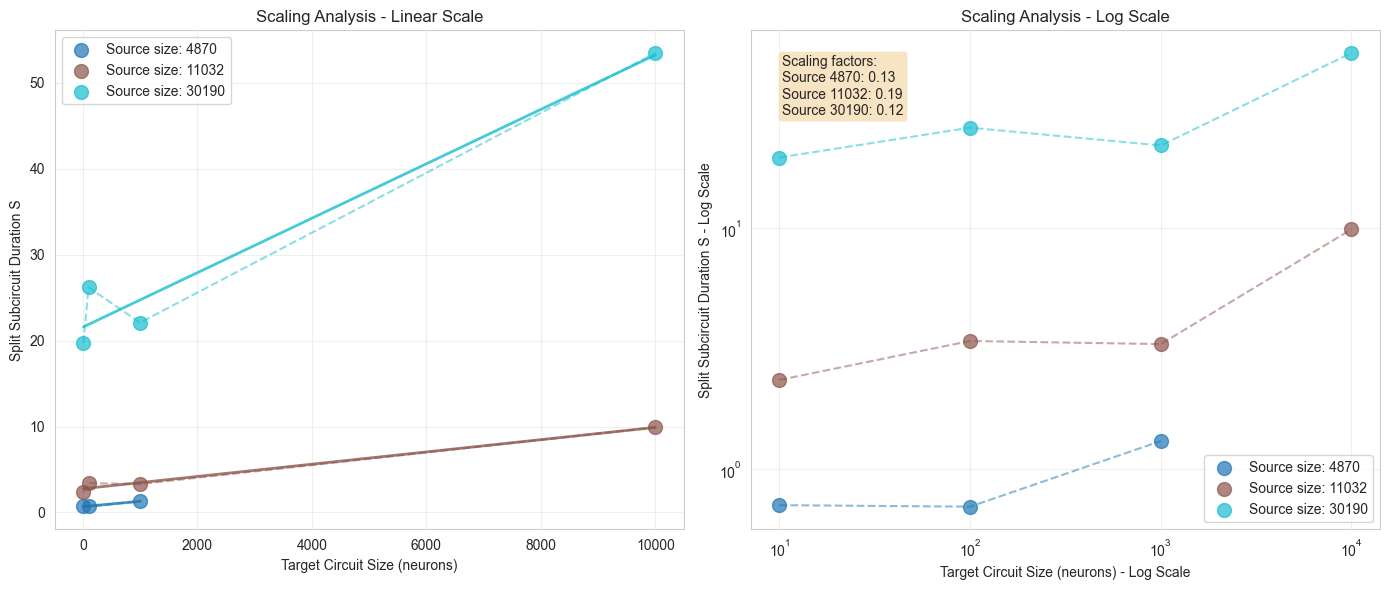

In [6]:
# Create plots
n_plots = int(SHOW_LINEAR) + int(SHOW_LOG)
if n_plots == 0:
    print("No plots enabled. Set SHOW_LINEAR or SHOW_LOG to True.")
else:
    fig, axes = plt.subplots(1, n_plots, figsize=(7*n_plots, 6))
    if n_plots == 1:
        axes = [axes]
    
    # Color palette for groups
    colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))
    
    plot_idx = 0
    
    # Linear scale plot
    if SHOW_LINEAR:
        ax = axes[plot_idx]
        
        for i, (group_value, group_data) in enumerate(groups.items()):
            x_vals = group_data['x_values']
            y_vals = group_data['y_values']
            
            # Scatter plot
            ax.scatter(x_vals, y_vals, s=100, alpha=0.7, color=colors[i], 
                      label=f'{GROUP_BY.title()} size: {group_value}')
            
            # Connect points
            ax.plot(x_vals, y_vals, '--', alpha=0.5, color=colors[i])
            
            # Trend line
            if SHOW_TREND_LINES and len(x_vals) > 1:
                z = np.polyfit(x_vals, y_vals, 1)
                p = np.poly1d(z)
                ax.plot(x_vals, p(x_vals), "-", alpha=0.8, color=colors[i], linewidth=2)
        
        ax.set_xlabel(f'{PLOT_BY.title()} Circuit Size (neurons)')
        ax.set_ylabel(f'{METRIC_COLUMN.replace("_", " ").title()}')
        ax.set_title('Scaling Analysis - Linear Scale')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plot_idx += 1
    
    # Log scale plot
    if SHOW_LOG:
        ax = axes[plot_idx]
        
        scaling_info = []
        
        for i, (group_value, group_data) in enumerate(groups.items()):
            x_vals = group_data['x_values']
            y_vals = group_data['y_values']
            
            # Check if log scale is applicable
            if all(v > 0 for v in x_vals) and all(v > 0 for v in y_vals):
                # Scatter plot
                ax.scatter(x_vals, y_vals, s=100, alpha=0.7, color=colors[i], 
                          label=f'{GROUP_BY.title()} size: {group_value}')
                
                # Connect points
                ax.plot(x_vals, y_vals, '--', alpha=0.5, color=colors[i])
                
                # Calculate scaling factor
                scaling_result = calculate_scaling_factor(x_vals, y_vals)
                if scaling_result and SHOW_SCALING_FACTORS:
                    slope, intercept = scaling_result
                    scaling_info.append(f'{GROUP_BY.title()} {group_value}: {slope:.2f}')
        
        # Set log scales
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel(f'{PLOT_BY.title()} Circuit Size (neurons) - Log Scale')
        ax.set_ylabel(f'{METRIC_COLUMN.replace("_", " ").title()} - Log Scale')
        ax.set_title('Scaling Analysis - Log Scale')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add scaling factors text
        if scaling_info and SHOW_SCALING_FACTORS:
            scaling_text = 'Scaling factors:\n' + '\n'.join(scaling_info)
            ax.text(0.05, 0.95, scaling_text, transform=ax.transAxes, 
                   bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8),
                   verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

## Detailed Analysis Summary

In [7]:
print(f"\n{'='*60}")
print(f"SCALING ANALYSIS SUMMARY")
print(f"{'='*60}")
print(f"Metric: {METRIC_COLUMN}")
print(f"Grouped by: {GROUP_BY} circuit size")
print(f"Plotted by: {PLOT_BY} circuit size")
print(f"{'='*60}")

for group_value, group_data in groups.items():
    print(f"\n{GROUP_BY.title()} Size: {group_value} neurons")
    print("-" * 40)
    
    x_vals = group_data['x_values']
    y_vals = group_data['y_values']
    labels = group_data['labels']
    
    # Data points
    for x, y, label in zip(x_vals, y_vals, labels):
        print(f"{PLOT_BY.title()} size: {x:>6} -> {METRIC_COLUMN}: {y:>8.2f} ({label})")
    
    # Scaling analysis
    if len(x_vals) > 1:
        size_ratio = max(x_vals) / min(x_vals)
        value_ratio = max(y_vals) / min(y_vals) if min(y_vals) > 0 else float('inf')
        
        print(f"\n  Size range: {min(x_vals)} - {max(x_vals)} (factor: {size_ratio:.1f})")
        print(f"  Metric range: {min(y_vals):.2f} - {max(y_vals):.2f} (factor: {value_ratio:.1f})")
        
        # Linear trend
        linear_slope, linear_intercept = np.polyfit(x_vals, y_vals, 1)
        print(f"  Linear trend: y = {linear_slope:.4f}x + {linear_intercept:.2f}")
        
        # Log-log scaling factor
        scaling_result = calculate_scaling_factor(x_vals, y_vals)
        if scaling_result:
            slope, intercept = scaling_result
            print(f"  Scaling factor (log-log): {slope:.2f}")
            if slope < 1:
                print(f"    → Sub-linear scaling (better than linear)")
            elif slope > 1:
                print(f"    → Super-linear scaling (worse than linear)")
            else:
                print(f"    → Linear scaling")
        else:
            print(f"  Scaling factor: Cannot calculate (non-positive values)")

print(f"\n{'='*60}")


SCALING ANALYSIS SUMMARY
Metric: split_subcircuit_duration_s
Grouped by: source circuit size
Plotted by: target circuit size

Source Size: 4870 neurons
----------------------------------------
Target size:     10 -> split_subcircuit_duration_s:     0.71 (nbS1-HEX0-L4 (10 neurons))
Target size:    100 -> split_subcircuit_duration_s:     0.70 (nbS1-HEX0-L4 (100 neurons))
Target size:   1000 -> split_subcircuit_duration_s:     1.31 (nbS1-HEX0-L4 (1000 neurons))

  Size range: 10 - 1000 (factor: 100.0)
  Metric range: 0.70 - 1.31 (factor: 1.9)
  Linear trend: y = 0.0006x + 0.67
  Scaling factor (log-log): 0.13
    → Sub-linear scaling (better than linear)

Source Size: 11032 neurons
----------------------------------------
Target size:     10 -> split_subcircuit_duration_s:     2.35 (nbS1-HEX0-L6 (10 neurons))
Target size:    100 -> split_subcircuit_duration_s:     3.41 (nbS1-HEX0-L6 (100 neurons))
Target size:   1000 -> split_subcircuit_duration_s:     3.31 (nbS1-HEX0-L6 (1000 neurons))


## Quick Configuration Examples

To change the analysis, modify the configuration cell above:

### Example 1: Group by target size, plot by source size
```python
GROUP_BY = 'target'
PLOT_BY = 'source'
METRIC_COLUMN = 'split_subcircuit_duration_s'
```

### Example 2: Analyze memory usage grouped by source size
```python
GROUP_BY = 'source'
PLOT_BY = 'target'
METRIC_COLUMN = 'resolve_circuit_peak_mem_mb'
```

### Example 3: Simple linear plot only
```python
SHOW_LINEAR = True
SHOW_LOG = False
SHOW_TREND_LINES = True
```